<a href="https://colab.research.google.com/github/nura6199/my-dissertation/blob/main/heart%20disease%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Load and Preprocess Data:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
# Load dataset
data = pd.read_csv('heart.csv')

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [48]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [52]:
data.shape

(1025, 14)

In [53]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


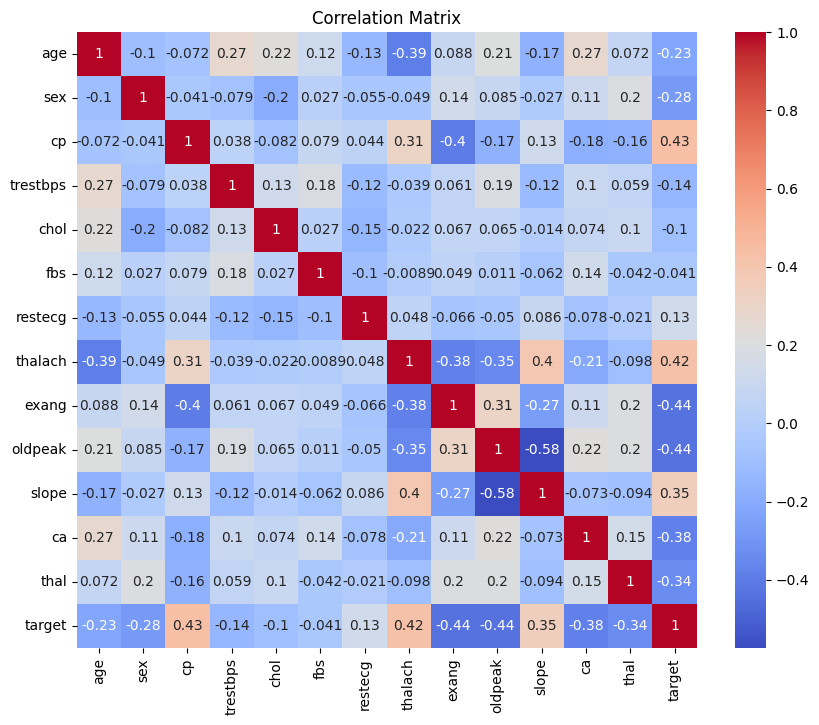

In [54]:
# Plot the correlation matrix using a heatmap
import seaborn as sns
import seaborn as sns
# Compute the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

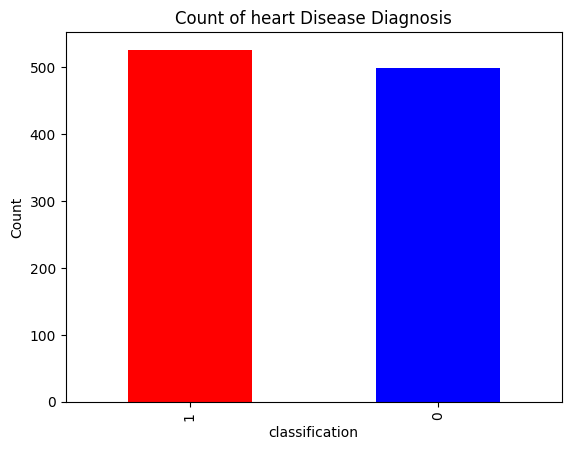

In [57]:
data['target'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Count of heart Disease Diagnosis")
plt.xlabel("classification")
plt.ylabel("Count")
plt.show()

Build Logistic Regression and Decision Tree Models:
python


In [4]:
# Build Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_preds = logreg_model.predict(X_test)

# Build Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


In [6]:
# Predict using Logistic Regression model
logreg_preds = logreg_model.predict(X_test)

# Predict using Decision Tree model
dt_preds = dt_model.predict(X_test)

# Evaluate Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_preds)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_accuracy)


Logistic Regression Accuracy: 0.7951219512195122
Decision Tree Accuracy: 0.9853658536585366


In [5]:
# Build ANN model
ann_model = Sequential()
ann_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile ANN model
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train ANN model
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
26/26 [==============================] - 1s 2ms/step - loss: 0.5692 - accuracy: 0.7293
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7939
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8293
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8512
Epoch 5/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8622
Epoch 6/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8634
Epoch 7/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8707
Epoch 8/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8768
Epoch 9/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8829
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8854
Epoch 11/50
26/26 [

In [9]:
# Predict using ANN model
ann_probs = ann_model.predict(X_test)
ann_preds = np.round(ann_probs).flatten().astype(int)

# Evaluate ANN model
ann_accuracy = accuracy_score(y_test, ann_preds)
print("ANN Model Accuracy:", ann_accuracy)


7/7 [==============================] - 0s 3ms/step
ANN Model Accuracy: 0.8634146341463415


In [10]:
# Predict using Logistic Regression model
logreg_preds = logreg_model.predict(X_test)

# Predict using Decision Tree model
dt_preds = dt_model.predict(X_test)

# Predict using ANN model
ann_probs = ann_model.predict(X_test)
ann_preds = np.round(ann_probs).flatten().astype(int)

# Combine predictions from all models
hybrid_preds = np.array([logreg_preds, dt_preds, ann_preds]).mean(axis=0).round()

# Evaluate hybrid model
hybrid_accuracy = accuracy_score(y_test, hybrid_preds)
print("Hybrid Model Accuracy:", hybrid_accuracy)
# Predict using Logistic Regression model
logreg_preds = logreg_model.predict(X_test)

# Predict using Decision Tree model
dt_preds = dt_model.predict(X_test)

# Predict using ANN model
ann_probs = ann_model.predict(X_test)
ann_preds = np.round(ann_probs).flatten().astype(int)

# Combine predictions from all models
hybrid_preds = np.array([logreg_preds, dt_preds, ann_preds]).mean(axis=0).round()

# Evaluate hybrid model
hybrid_accuracy = accuracy_score(y_test, hybrid_preds)
print("Hybrid Model Accuracy:", hybrid_accuracy)


7/7 [==============================] - 0s 3ms/step
Hybrid Model Accuracy: 0.8780487804878049
7/7 [==============================] - 0s 3ms/step
Hybrid Model Accuracy: 0.8780487804878049


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate and print metrics for Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_precision = precision_score(y_test, logreg_preds)
logreg_recall = recall_score(y_test, logreg_preds)
logreg_f1 = f1_score(y_test, logreg_preds)
print("Logistic Regression Metrics:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1 Score:", logreg_f1)

Logistic Regression Metrics:
Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1 Score: 0.8108108108108107


In [12]:
# Calculate and print metrics for Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
print("\nDecision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)



Decision Tree Metrics:
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473


In [13]:
# Calculate and print metrics for ANN model
ann_accuracy = accuracy_score(y_test, ann_preds)
ann_precision = precision_score(y_test, ann_preds)
ann_recall = recall_score(y_test, ann_preds)
ann_f1 = f1_score(y_test, ann_preds)
print("\nANN Metrics:")
print("Accuracy:", ann_accuracy)
print("Precision:", ann_precision)
print("Recall:", ann_recall)
print("F1 Score:", ann_f1)



ANN Metrics:
Accuracy: 0.8634146341463415
Precision: 0.8440366972477065
Recall: 0.8932038834951457
F1 Score: 0.8679245283018868


In [14]:
# Calculate and print metrics for Hybrid model
hybrid_accuracy = accuracy_score(y_test, hybrid_preds)
hybrid_precision = precision_score(y_test, hybrid_preds)
hybrid_recall = recall_score(y_test, hybrid_preds)
hybrid_f1 = f1_score(y_test, hybrid_preds)
print("\nHybrid Model Metrics:")
print("Accuracy:", hybrid_accuracy)
print("Precision:", hybrid_precision)
print("Recall:", hybrid_recall)
print("F1 Score:", hybrid_f1)


Hybrid Model Metrics:
Accuracy: 0.8780487804878049
Precision: 0.8611111111111112
Recall: 0.9029126213592233
F1 Score: 0.8815165876777251


In [15]:
from sklearn.metrics import classification_report

# Print classification report for Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_preds))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [16]:
# Print classification report for Decision Tree model
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_preds))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [17]:
# Print classification report for ANN model
print("ANN Classification Report:")
print(classification_report(y_test, ann_preds))

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       102
           1       0.84      0.89      0.87       103

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [18]:
# Print classification report for Hybrid model
print("Hybrid Model Classification Report:")
print(classification_report(y_test, hybrid_preds))

Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.86      0.90      0.88       103

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix heatmap with custom colormap
def plot_confusion_heatmap(conf_matrix, title, colormap):
    plt.figure(figsize=(5, 2))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=colormap, cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

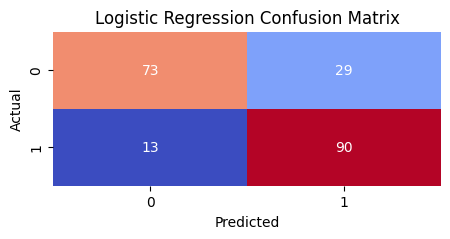

In [26]:
# Usage for Logistic Regression model with a different colormap
plot_confusion_heatmap(logreg_conf_matrix, "Logistic Regression Confusion Matrix", "coolwarm")


In [29]:
# Calculate confusion matrix for Decision Tree model
dt_conf_matrix = confusion_matrix(y_test, dt_preds)

In [30]:
# Calculate confusion matrix for Logistic Regression model
logreg_conf_matrix = confusion_matrix(y_test, logreg_preds)

In [31]:
# Calculate confusion matrix for ANN model
ann_conf_matrix = confusion_matrix(y_test, ann_preds)


In [32]:
# Calculate confusion matrix for Hybrid model
hybrid_conf_matrix = confusion_matrix(y_test, hybrid_preds)


In [35]:
# Define a function to plot confusion matrix heatmap with custom colormap
def plot_confusion_heatmap(conf_matrix, title, colormap):
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=colormap, cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

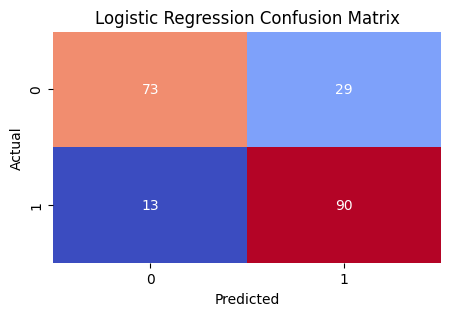

In [36]:
# Usage for Logistic Regression model with a different colormap
plot_confusion_heatmap(logreg_conf_matrix, "Logistic Regression Confusion Matrix", "coolwarm")


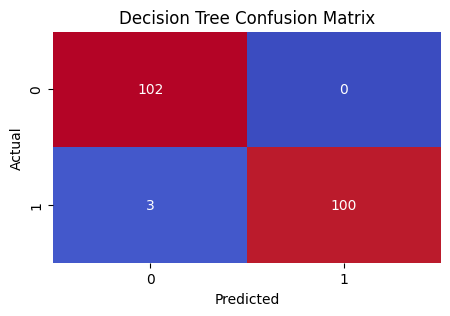

In [38]:
# Usage for Decision Tree model with a different colormap
plot_confusion_heatmap(dt_conf_matrix, "Decision Tree Confusion Matrix", "coolwarm")


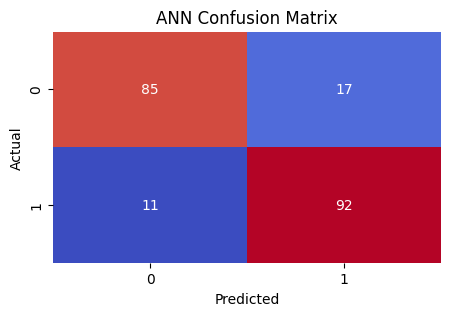

In [40]:
# Usage for ANN model with a different colormap
plot_confusion_heatmap(ann_conf_matrix, "ANN Confusion Matrix", "coolwarm")


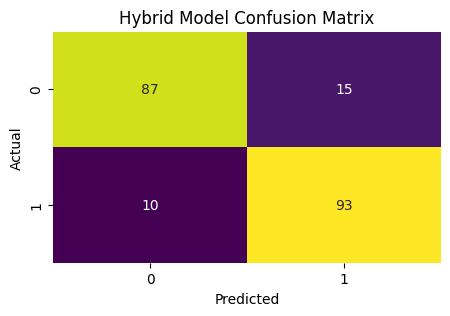

In [41]:
# Usage for Hybrid model with a different colormap
plot_confusion_heatmap(hybrid_conf_matrix, "Hybrid Model Confusion Matrix", "viridis")

7/7 [==============================] - 0s 5ms/step


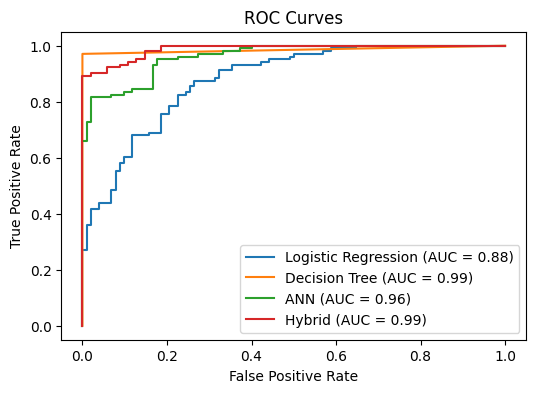

In [46]:
# Calculate ROC curve and AUC for Logistic Regression model
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_auc = auc(logreg_fpr, logreg_tpr)

# Calculate ROC curve and AUC for Decision Tree model
dt_probs = dt_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

# Calculate ROC curve and AUC for ANN model
ann_probs = ann_model.predict(X_test)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_probs)
ann_auc = auc(ann_fpr, ann_tpr)

# Calculate ROC curve and AUC for Hybrid model
hybrid_probs = (logreg_probs + dt_probs + ann_probs.flatten()) / 3
hybrid_fpr, hybrid_tpr, _ = roc_curve(y_test, hybrid_probs)
hybrid_auc = auc(hybrid_fpr, hybrid_tpr)

# Plot ROC curves for all models
plt.figure(figsize=(6,4))
plt.plot(logreg_fpr, logreg_tpr, label=f"Logistic Regression (AUC = {logreg_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot(ann_fpr, ann_tpr, label=f"ANN (AUC = {ann_auc:.2f})")
plt.plot(hybrid_fpr, hybrid_tpr, label=f"Hybrid (AUC = {hybrid_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()
